In [5]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [6]:
dataset = pd.read_csv('crypto-markets.csv')

In [7]:
dataset.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0,1500520000,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0,1491160000,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0,1597780000,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0,1542820000,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0,1292190000,0.3881,33.32


In [8]:
dataset.describe()

,ranknow,open,high,low,close,volume,market,close_ratio,spread
count,702166.000000,7.021660e+05,7.021660e+05,7.021660e+05,7.021660e+05,7.021660e+05,7.021660e+05,7.021660e+05,7.021660e+05
mean,734.561943,2.696117e+02,3.284954e+02,2.210024e+02,2.694796e+02,5.544493e+06,1.202024e+08,-inf,1.074927e+02
std,411.195482,1.219343e+04,1.558344e+04,9.686538e+03,1.217104e+04,1.673788e+08,3.074096e+09,NaN,7.207118e+03
min,1.000000,2.500000e-09,3.200000e-09,9.200000e-14,0.000000e+00,0.000000e+00,0.000000e+00,-inf,0.000000e+00
25%,397.000000,5.280000e-04,6.210000e-04,4.550000e-04,5.290000e-04,2.700000e+01,7.095000e+03,1.429000e-01,0.000000e+00
50%,746.000000,8.753000e-03,1.016400e-02,7.630000e-03,8.768000e-03,5.030000e+02,9.402450e+04,4.331000e-01,0.000000e+00
75%,1032.000000,1.333997e-01,1.523455e-01,1.170855e-01,1.336785e-01,1.325400e+04,1.326118e+06,7.703000e-01,3.000000e-02
max,1516.000000,2.298390e+06,2.926100e+06,2.030590e+06,2.300740e+06,2.384090e+10,3.261410e+11,1.000000e+00,1.770563e+06


In [53]:
dataset.groupby(['ranknow'])

In [7]:
# dataset.groupby('name')

In [7]:
dataset['name'].describe()

count       702166
unique        1514
top       HempCoin
freq          2030
Name: name, dtype: object

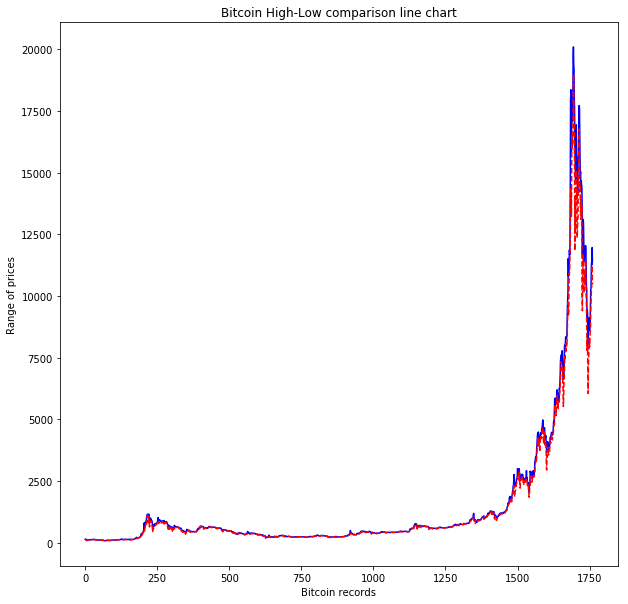

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
d = dataset[dataset['name'] == 'Bitcoin']
plt.plot(d['high'],'b',d['low'],'r--')
plt.title('Bitcoin High-Low comparison line chart')
plt.ylabel('Range of prices')
plt.xlabel('Bitcoin records')
plt.show()
# plt.lagends()

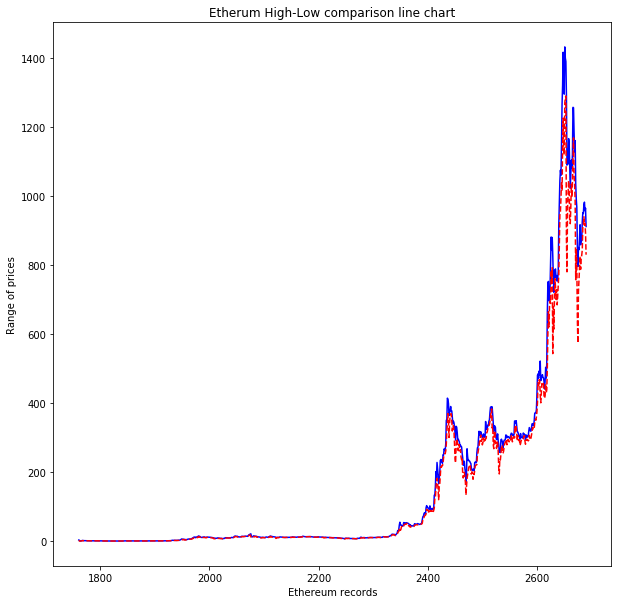

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
d = dataset[dataset['name'] == 'Ethereum']
plt.plot(d['high'],'b',d['low'],'r--')
plt.title('Etherum High-Low comparison line chart')
plt.ylabel('Range of prices')
plt.xlabel('Ethereum records')
plt.show()

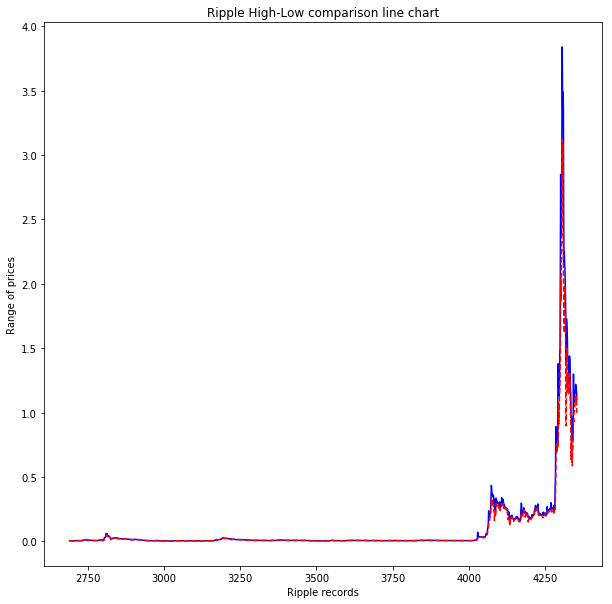

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
d = dataset[dataset['name'] == 'Ripple']
plt.plot(d['high'],'b',d['low'],'r--')
plt.title('Ripple High-Low comparison line chart')
plt.ylabel('Range of prices')
plt.xlabel('Ripple records')
plt.show()

In [26]:
# import matplotlib.pyplot as plt
# d = dataset[dataset['name'] == 'HempCoin']
# plt.plot(d['high'],'b',d['low'],'r--')
# plt.show()

# Min-Max Normalization

In [118]:
import pandas as pd
scaler = MinMaxScaler()
dat = dataset[['open','high', 'low', 'close', 'market', 'volume']]
scaler.fit(dat)
dat = scaler.transform(dat)
commonScaleData = pd.DataFrame(dat,columns=['open','high', 'low', 'close', 'market', 'volume'])
namesDF = pd.DataFrame(dataset['name'],columns = ['name'])
dateDf = pd.DataFrame(pd.to_datetime(dataset['date']),columns = ['date'])
MinMaxNormalizeData=pd.concat([ dateDf, namesDF, commonScaleData ], axis=1)
# commonScaleData

In [119]:
MinMaxNormalizeData

,date,name,open,high,low,close,market,volume
0,2013-04-28,Bitcoin,5.886729e-05,4.647141e-05,6.505498e-05,5.833341e-05,0.004601,0.000000e+00
1,2013-04-29,Bitcoin,5.849312e-05,5.040498e-05,6.599067e-05,6.282327e-05,0.004572,0.000000e+00
2,2013-04-30,Bitcoin,6.265255e-05,5.021359e-05,6.601530e-05,6.041534e-05,0.004899,0.000000e+00
3,2013-05-01,Bitcoin,6.047712e-05,4.780766e-05,5.304862e-05,5.084886e-05,0.004731,0.000000e+00
4,2013-05-02,Bitcoin,5.063544e-05,4.292403e-05,4.544492e-05,4.572877e-05,0.003962,0.000000e+00
5,2013-05-03,Bitcoin,4.622801e-05,3.695362e-05,3.895420e-05,4.248633e-05,0.003618,0.000000e+00
6,2013-05-04,Bitcoin,4.268205e-05,3.930146e-05,4.555326e-05,4.889731e-05,0.003342,0.000000e+00
7,2013-05-05,Bitcoin,4.912134e-05,4.060012e-05,5.276299e-05,5.037944e-05,0.003847,0.000000e+00
8,2013-05-06,Bitcoin,5.046141e-05,4.260278e-05,5.251676e-05,4.881038e-05,0.003954,0.000000e+00
9,2013-05-07,Bitcoin,4.883853e-05,3.876833e-05,4.811409e-05,4.846267e-05,0.003828,0.000000e+00


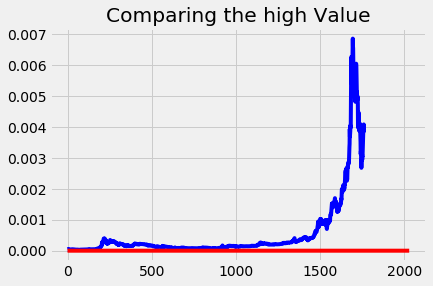

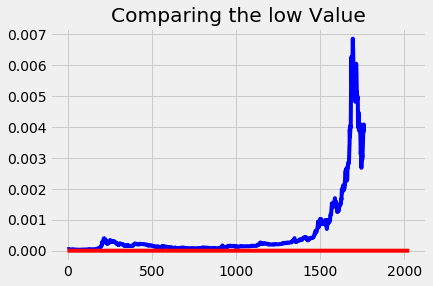

In [142]:
import matplotlib.pyplot as plt
selectedBitcoin = dat[dat['name'] == 'Bitcoin']
selectedHempCoin = dat[dat['name'] == 'HempCoin']
selectedEthereum = dat[dat['name'] == 'Ethereum']
selectedRipple = dat[dat['name'] == 'Ripple']
Bitcoin = pd.DataFrame(selectedBitcoin.as_matrix(), columns = ['name','open','high', 'low', 'close'])
Ethereum = pd.DataFrame(selectedHempCoin.as_matrix(), columns = ['name','open','high', 'low', 'close'])
HempCoin = pd.DataFrame(selectedEthereum.as_matrix(), columns = ['name','open','high', 'low', 'close'])
Ripple = pd.DataFrame(selectedRipple.as_matrix(), columns = ['name','open','high', 'low', 'close'])
plt.title('Comparing the high Value')
plt.plot(Bitcoin['high'],'b',Ethereum['high'], 'r' )
plt.show()
plt.title('Comparing the low Value')
plt.plot(Bitcoin['high'],'b', Ethereum['low'], 'r' )
plt.show()

In [14]:
dataset

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.300000,135.980000,132.100000,134.210000,0,1500520000,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.440000,147.490000,134.000000,144.540000,0,1491160000,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.000000,146.930000,134.050000,139.000000,0,1597780000,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.000000,139.890000,107.720000,116.990000,0,1542820000,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.380000,125.600000,92.280000,105.210000,0,1292190000,0.3881,33.32
5,bitcoin,BTC,Bitcoin,2013-05-03,1,106.250000,108.130000,79.100000,97.750000,0,1180070000,0.6424,29.03
6,bitcoin,BTC,Bitcoin,2013-05-04,1,98.100000,115.000000,92.500000,112.500000,0,1089890000,0.8889,22.50
7,bitcoin,BTC,Bitcoin,2013-05-05,1,112.900000,118.800000,107.140000,115.910000,0,1254760000,0.7521,11.66
8,bitcoin,BTC,Bitcoin,2013-05-06,1,115.980000,124.660000,106.640000,112.300000,0,1289470000,0.3141,18.02
9,bitcoin,BTC,Bitcoin,2013-05-07,1,112.250000,113.440000,97.700000,111.500000,0,1248470000,0.8767,15.74


In [15]:
# grouping data first on the basis on date and then on the basis of name, then depicting the market mean of this data
#  
marketData = dataset.groupby(['date', 'name']).mean().unstack()
# makretData = marketData.unstack()
# ['market'].mean().unstack()
# plt.plot(marketData['high'])
# plt.show()
marketData

ranknow                                                             \
name            0x  2GIVE 300 Token 42-coin 808Coin    8Bit ACChain AI Doctor   
date                                                                            
2013-04-28     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-04-29     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-04-30     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-01     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-02     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-03     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-04     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-05     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-06     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-07     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-08     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-09     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-10     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-11     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-12     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-13     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-14     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-15     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-16     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-17     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-18     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-19     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-20     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-21     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-22     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-23     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-24     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-25     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-26     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-27     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
...            ...    ...       ...     ...     ...     ...     ...       ...   
2018-01-23    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-01-24    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-01-25    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-01-26    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-01-27    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-01-28    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-01-29    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-01-30    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-01-31    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-02-01    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-02-02    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-02-03    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-02-04    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-02-05    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-02-06    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-02-07    44.0  552.0     909.0   660.

In [16]:
plt.show()

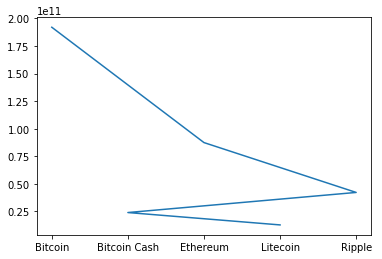

In [209]:
# Ordered most frequent currencies
marketData = dataset.groupby(['name'])['market']
marketData = marketData.last()
OrderedmarketData = marketData.sort_values(ascending=False)
# OrderedMostFrequencyIndexes = marketData.sort_values(ascending=False).index
# MostFrequentOrderedData = dataset[dataset['name'].isin(OrderedMostFrequencyIndexes)]
# marketData = marketData.head(5)
# marketData
plt.plot(OrderedmarketData.head(5))
plt.show()
top_5_frquennt_currencies_names = OrderedmarketData.head(5).index
top_5_frequent_currencies_allData = dataset[dataset['name'].isin(top_5_frquennt_currencies_names)]
# top 5 frequent data
# OrderedmarketData.head
# top_5_frequent_currencies_allData

/Users/jatintaneja/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


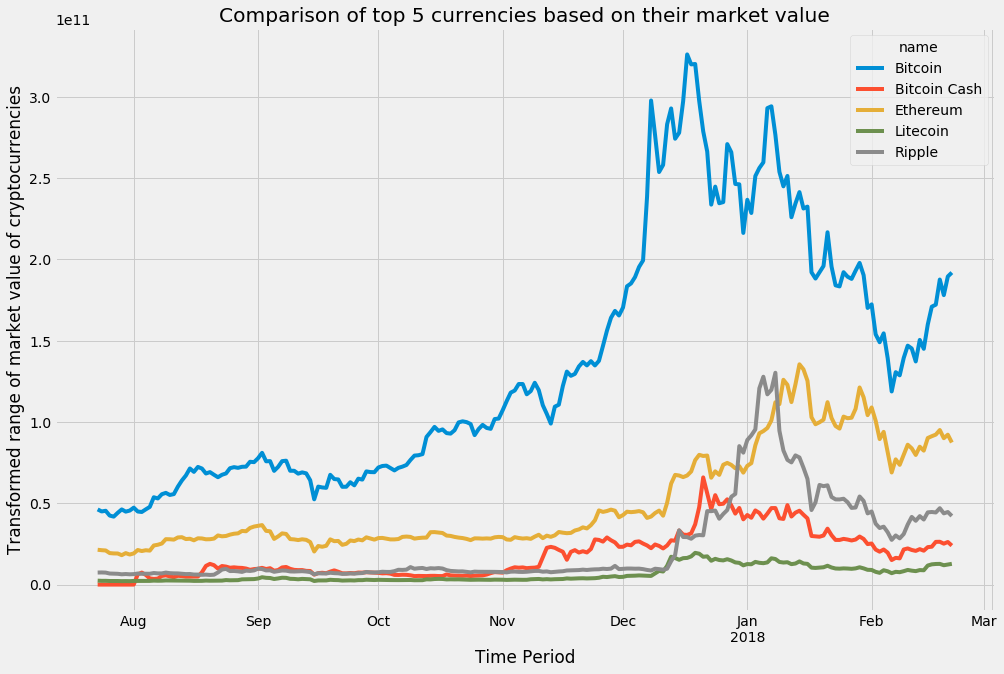

In [230]:
import matplotlib.dates as xaxisdates
# fig,ax = plt.subplots(figsize=(10, 10))
# ax.xaxis_date() 
# ax.xaxis.set_major_formatter(xaxisdates.DateFormatter('%Y-%m-%d'))
# plt.plot(marketCapTrendOfTop5Currencies_dropNA)
# plt.title('Comparison of top 5 currencies based on their market value')
# plt.ylabel('Transformed range of market value of cryptocurrencies')
# plt.xlabel('Time Period')
# plt.gcf().autofmt_xdate()
top_5_frequent_currencies_allData['date'] = pd.to_datetime(top_5_frequent_currencies_allData['date'])
top_5_frequent_currencies_allData
# marketCapTrendOfTop5Currencies = top_5_frequent_currencies_allData.groupby(['date','name'])
marketCapTrendOfTop5Currencies = top_5_frequent_currencies_allData.groupby(['date','name'])['market'].mean().unstack()
# marketCapTrendOfTop5Currencies

# marketCapTrendOfTop5Currencies_fillNa = marketCapTrendOfTop5Currencies.fillna(method = 'bfill', axis = 1)
# marketCapTrendOfTop5Currencies_fillNa.plot(legend=True,figsize=(10, 10), 
#                                             title='Comparison of top 5 currencies based on their market value')
# plt.ylabel('Transformed range of market value of cryptocurrencies')
# plt.xlabel('Time Period')
# plt.show()

marketCapTrendOfTop5Currencies_dropNA = marketCapTrendOfTop5Currencies.dropna(axis=0, how='any')
marketCapTrendOfTop5Currencies_dropNA.plot(legend=True,figsize=(15, 10), 
                                            title='Comparison of top 5 currencies based on their market value')
plt.ylabel('Transformed range of market value of cryptocurrencies')
plt.xlabel('Time Period')
plt.show()

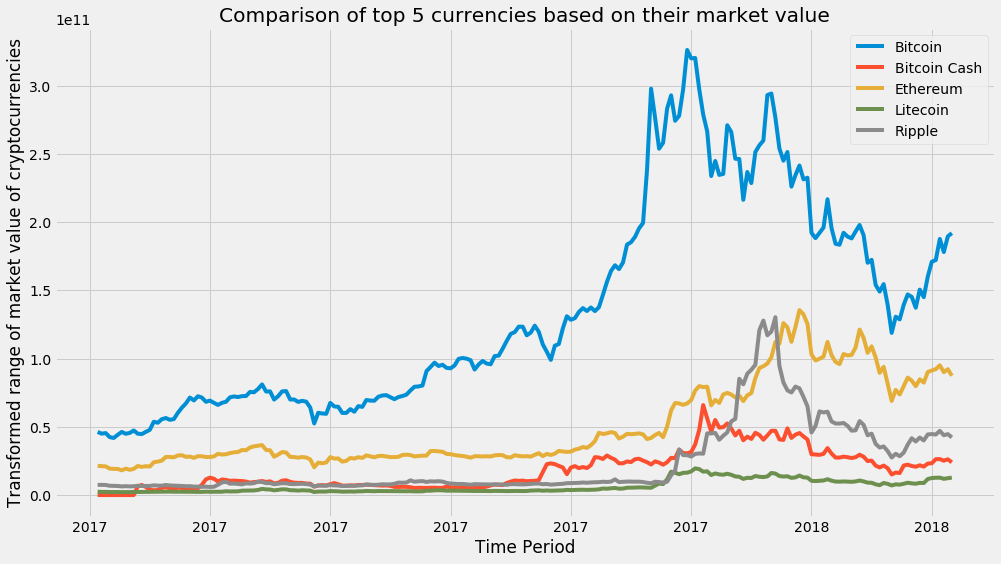

In [229]:
import matplotlib.pyplot as plt
import matplotlib.dates as xaxisdates
fig,ax = plt.subplots(figsize=(15, 10))
# ax.xaxis_date() 
# ax.set_xticks([], minor=True)
ax.xaxis.set_major_locator(xaxisdates.DayLocator(interval = 30))
# ax.xaxis.set_major_formatter(xaxisdates.DateFormatter('%m-%Y'))
plt.xticks(fontsize = 8)
# ax.xaxis_date()
plt.gcf().autofmt_xdate()
marketCapTrendOfTop5Currencies = top_5_frequent_currencies_allData.groupby(['date','name'])['market'].mean().unstack()
marketCapTrendOfTop5Currencies_dropNA = marketCapTrendOfTop5Currencies.dropna(axis=0, how='any')
plt.plot(marketCapTrendOfTop5Currencies_dropNA.index,marketCapTrendOfTop5Currencies_dropNA.values)
plt.title('Comparison of top 5 currencies based on their market value')
plt.ylabel('Transformed range of market value of cryptocurrencies')
plt.xlabel('Time Period')
plt.legend(marketCapTrendOfTop5Currencies_dropNA.columns)
plt.show()

In [105]:
# marketCapTrendOfTop5Currencies_dropNA.index

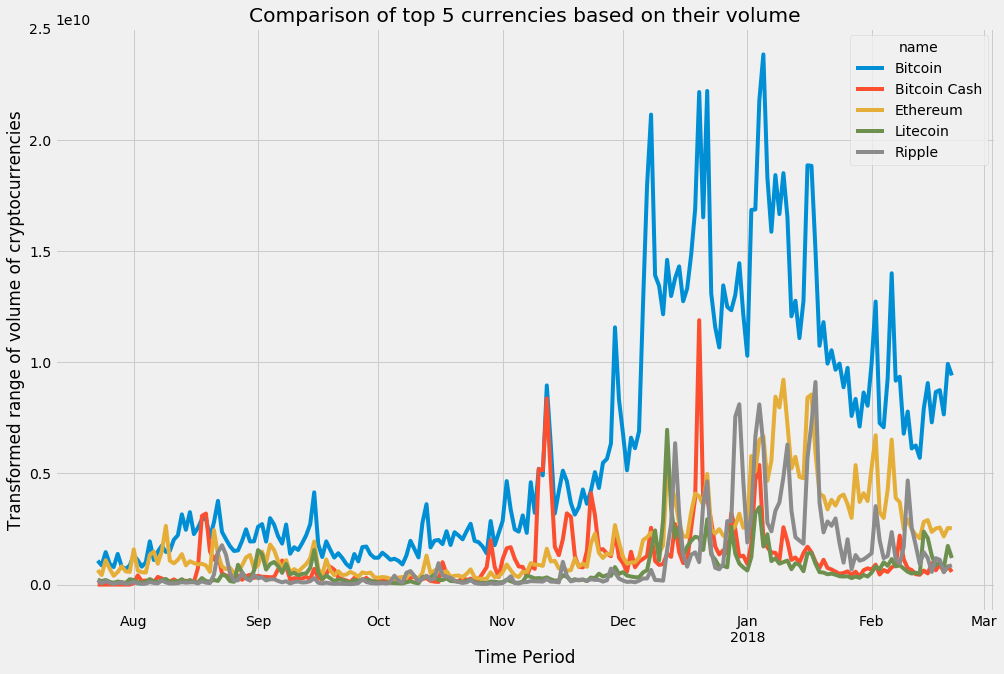

In [228]:
VolumeTrendOfTop5Currencies = top_5_frequent_currencies_allData.groupby(['date','name'])['volume'].mean().unstack()
VolumeTrendOfTop5Currencies_dropNA = VolumeTrendOfTop5Currencies.dropna(axis=0, how='any')
# plt.title('Comparison of top 5 currencies based on their volume')
# plt.ylabel('Transformed range of volume of cryptocurrencies')
# plt.xlabel('Time Period')
# plt.plot(marketCapTrendOfTop5Currencies)
# plt.legend()
plt.style.use('fivethirtyeight')
VolumeTrendOfTop5Currencies_dropNA.plot(legend=True,figsize=(15, 10), 
                                        title='Comparison of top 5 currencies based on their volume')
plt.ylabel('Transformed range of volume of cryptocurrencies')
plt.xlabel('Time Period')
# plt.gcf().autofmt_xdate()
plt.show()

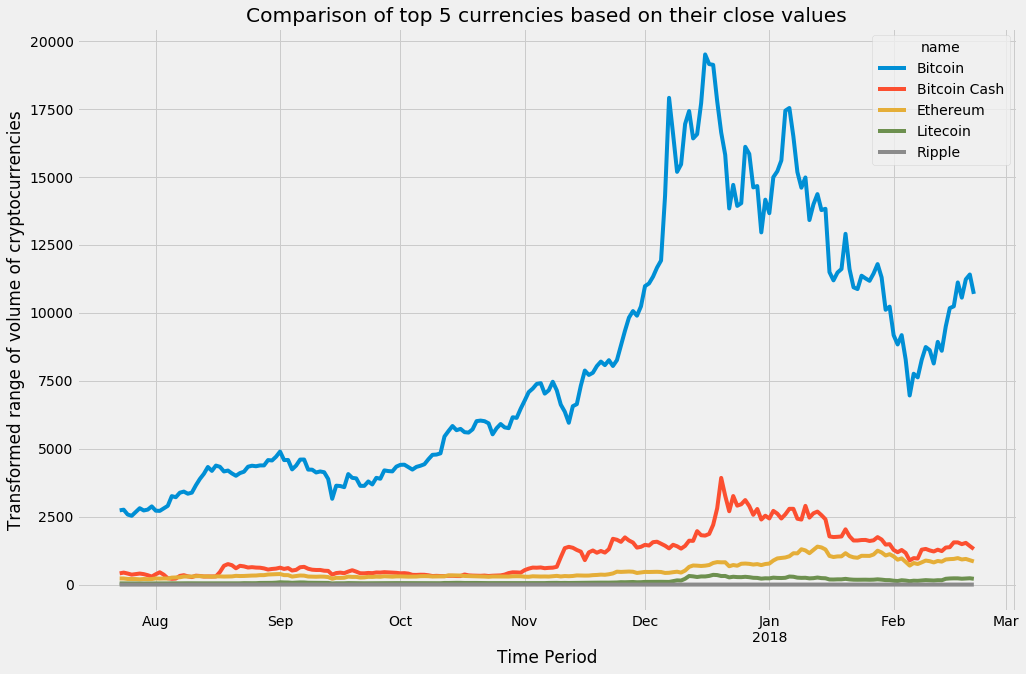

In [231]:
top5CurrenciesPricePerUnit = top_5_frequent_currencies_allData.groupby(['date','name'])['close'].mean().unstack()
top5CurrenciesPricePerUnit_dropNA = top5CurrenciesPricePerUnit.dropna(axis=0, how='any')
plt.style.use('fivethirtyeight')
# plt.plot(marketCapTrendOfTop5Currencies)
# fig = plt.figure(figsize=(10, 10))
# plt.title('Comparison of top 5 currencies based on their volume')
top5CurrenciesPricePerUnit_dropNA.plot(legend=True,figsize=(15, 10), 
                                        title='Comparison of top 5 currencies based on their close values')
plt.ylabel('Transformed range of volume of cryptocurrencies')
plt.xlabel('Time Period')
plt.show()

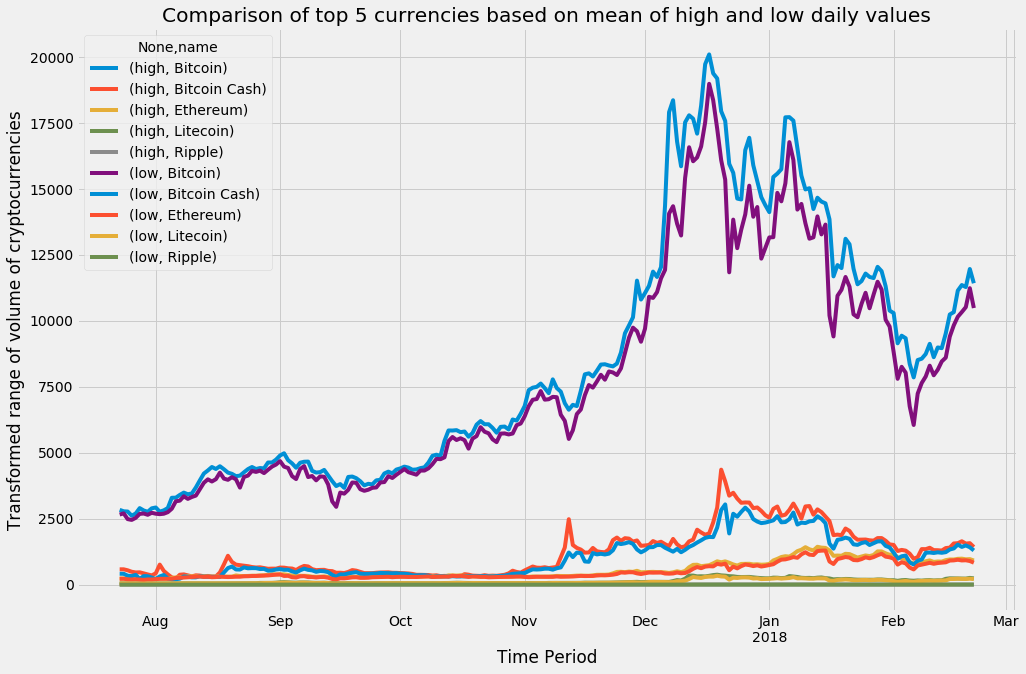

In [232]:
FluctuationOfTop5Currencies = top_5_frequent_currencies_allData.groupby(['date','name'])['high','low'].mean().unstack()
FluctuationOfTop5Currencies_dropNA = FluctuationOfTop5Currencies.dropna(axis=0, how='any')
FluctuationOfTop5Currencies_dropNA.plot(legend=True,figsize=(15, 10), 
                                        title='Comparison of top 5 currencies based on mean of high and low daily values')
# plt.style.reset()
plt.ylabel('Transformed range of volume of cryptocurrencies')
plt.xlabel('Time Period')
# plt.plot(marketCapTrendOfTop5Currencies)
plt.show()

In [6]:
dataset

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.300000,135.980000,132.100000,134.210000,0,1500520000,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.440000,147.490000,134.000000,144.540000,0,1491160000,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.000000,146.930000,134.050000,139.000000,0,1597780000,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.000000,139.890000,107.720000,116.990000,0,1542820000,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.380000,125.600000,92.280000,105.210000,0,1292190000,0.3881,33.32
5,bitcoin,BTC,Bitcoin,2013-05-03,1,106.250000,108.130000,79.100000,97.750000,0,1180070000,0.6424,29.03
6,bitcoin,BTC,Bitcoin,2013-05-04,1,98.100000,115.000000,92.500000,112.500000,0,1089890000,0.8889,22.50
7,bitcoin,BTC,Bitcoin,2013-05-05,1,112.900000,118.800000,107.140000,115.910000,0,1254760000,0.7521,11.66
8,bitcoin,BTC,Bitcoin,2013-05-06,1,115.980000,124.660000,106.640000,112.300000,0,1289470000,0.3141,18.02
9,bitcoin,BTC,Bitcoin,2013-05-07,1,112.250000,113.440000,97.700000,111.500000,0,1248470000,0.8767,15.74


In [10]:
dataset['date']

0         2013-04-28
1         2013-04-29
2         2013-04-30
3         2013-05-01
4         2013-05-02
5         2013-05-03
6         2013-05-04
7         2013-05-05
8         2013-05-06
9         2013-05-07
10        2013-05-08
11        2013-05-09
12        2013-05-10
13        2013-05-11
14        2013-05-12
15        2013-05-13
16        2013-05-14
17        2013-05-15
18        2013-05-16
19        2013-05-17
20        2013-05-18
21        2013-05-19
22        2013-05-20
23        2013-05-21
24        2013-05-22
25        2013-05-23
26        2013-05-24
27        2013-05-25
28        2013-05-26
29        2013-05-27
             ...    
702136    2017-12-02
702137    2017-12-03
702138    2017-12-09
702139    2017-12-10
702140    2017-12-12
702141    2017-12-13
702142    2017-12-14
702143    2017-12-15
702144    2017-12-16
702145    2017-12-17
702146    2017-12-18
702147    2017-12-19
702148    2017-12-20
702149    2017-12-21
702150    2017-12-22
702151    2017-12-23
702152    201

In [11]:
# df['DOB1'] = df['DOB'].dt.strftime('%m/%d/%Y')
dataset['year'] = pd.to_datetime(dataset['date']).dt.strftime('%Y')

In [12]:
dataset

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,year
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.300000,135.980000,132.100000,134.210000,0,1500520000,0.5438,3.88,2013
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.440000,147.490000,134.000000,144.540000,0,1491160000,0.7813,13.49,2013
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.000000,146.930000,134.050000,139.000000,0,1597780000,0.3843,12.88,2013
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.000000,139.890000,107.720000,116.990000,0,1542820000,0.2882,32.17,2013
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.380000,125.600000,92.280000,105.210000,0,1292190000,0.3881,33.32,2013
5,bitcoin,BTC,Bitcoin,2013-05-03,1,106.250000,108.130000,79.100000,97.750000,0,1180070000,0.6424,29.03,2013
6,bitcoin,BTC,Bitcoin,2013-05-04,1,98.100000,115.000000,92.500000,112.500000,0,1089890000,0.8889,22.50,2013
7,bitcoin,BTC,Bitcoin,2013-05-05,1,112.900000,118.800000,107.140000,115.910000,0,1254760000,0.7521,11.66,2013
8,bitcoin,BTC,Bitcoin,2013-05-06,1,115.980000,124.660000,106.640000,112.300000,0,1289470000,0.3141,18.02,2013
9,bitcoin,BTC,Bitcoin,2013-05-07,1,112.250000,113.440000,97.700000,111.500000,0,1248470000,0.8767,15.74,2013


In [13]:
# dataset = pd.read_csv('crypto-markets.csv')
dataset_indexed = dataset.set_index(['name', 'year']).sort_index()

In [14]:
dataset_temp = dataset_indexed[dataset_indexed['market'] != 0]
dataset_temp

slug symbol        date  ranknow      open      high  \
name     year                                                             
0x       2017        0x    ZRX  2017-08-16       44  0.111725  0.280031   
         2017        0x    ZRX  2017-08-17       44  0.223022  0.238935   
         2017        0x    ZRX  2017-08-18       44  0.205558  0.350260   
         2017        0x    ZRX  2017-08-19       44  0.294578  0.543728   
         2017        0x    ZRX  2017-08-20       44  0.471296  0.475262   
         2017        0x    ZRX  2017-08-21       44  0.422273  0.443680   
         2017        0x    ZRX  2017-08-22       44  0.351547  0.375577   
         2017        0x    ZRX  2017-08-23       44  0.364010  0.410874   
         2017        0x    ZRX  2017-08-24       44  0.382705  0.392537   
         2017        0x    ZRX  2017-08-25       44  0.387431  0.394479   
         2017        0x    ZRX  2017-08-26       44  0.362022  0.377722   
         2017        0x    ZRX  2017-08-27       44  0.354806  0.356997   
         2017        0x    ZRX  2017-08-28       44  0.352459  0.354823   
         2017        0x    ZRX  2017-08-29       44  0.341101  0.372469   
         2017        0x    ZRX  2017-08-30       44  0.361106  0.364266   
         2017        0x    ZRX  2017-08-31       44  0.330970  0.374500   
         2017        0x    ZRX  2017-09-01       44  0.372777  0.402174   
         2017        0x    ZRX  2017-09-02       44  0.384540  0.391341   
         2017        0x    ZRX  2017-09-03       44  0.307518  0.328170   
         2017        0x    ZRX  2017-09-04       44  0.285917  0.286994   
         2017        0x    ZRX  2017-09-05       44  0.236484  0.247325   
         2017        0x    ZRX  2017-09-06       44  0.236535  0.258303   
         2017        0x    ZRX  2017-09-07       44  0.256450  0.331923   
         2017        0x    ZRX  2017-09-08       44  0.309705  0.313270   
         2017        0x    ZRX  2017-09-09       44  0.258422  0.259154   
         2017        0x    ZRX  2017-09-10       44  0.258124  0.258124   
         2017        0x    ZRX  2017-09-11       44  0.246839  0.275266   
         2017        0x    ZRX  2017-09-12       44  0.275405  0.289507   
         2017        0x    ZRX  2017-09-13       44  0.257031  0.257911   
         2017        0x    ZRX  2017-09-14       44  0.223408  0.228707   
...                 ...    ...         ...      ...       ...       ...   
vTorrent 2018  vtorrent    VTR  2018-01-23      518  0.770872  0.807709   
         2018  vtorrent    VTR  2018-01-24      518  0.769083  0.844690   
         2018  vtorrent    VTR  2018-01-25      518  0.798719  0.823876   
         2018  vtorrent    VTR  2018-01-26      518  0.778881  0.805300   
         2018  vtorrent    VTR  2018-01-27      518  0.765669  0.813012   
         2018  vtorrent    VTR  2018-01-28      518  0.802742  0.828805   
         2018  vtorrent    VTR  2018-01-29      518  0.799810  0.809576   
         2018  vtorrent    VTR  2018-01-30      518  0.748255  0.749908   
         2018  vtorrent    VTR  2018-01-31      518  0.618437  0.640980   
         2018  vtorrent    VTR  2018-02-01      518  0.616226  0.628010   
         2018  vtorrent    VTR  2018-02-02      518  0.475868  0.493326   
         2018  vtorrent    VTR  2018-02-03      518  0.473092  0.519364   
         2018  vtorrent    VTR  2018-02-04      518  0.497990  0.513539   
         2018  vtorrent    VTR  2018-02-05      518  0.427958  0.558929   
         2018  vtorrent    VTR  2018-02-06      518  0.538569  0.646488   
         2018  vtorrent    VTR  2018-02-07      518  0.629224  0.712197   
         2018  vtorrent    VTR  2018-02-08      518  0.631838  0.734241   
         2018  vtorrent    VTR  2018-02-09      518  0.665517  0.711946   
         2018  vtorrent    VTR  2018-02-10      518  0.693633  0.719144   
         2018  vtorrent    VTR  2018-02-11      518  0.680986  0.680986   
         2018  vtorrent    VTR  2018-02-12  

In [1]:
def topKCurrenciesByAttribute(k,attribute):
    data = dataset_indexed.groupby(['name']).sum().sort_values(attribute, ascending=False)[attribute].head(k)
    return data

In [2]:
def bottomKCurrenciesByAttribute(k,attribute):
    data = dataset_indexed.groupby(['name']).sum().sort_values(attribute, ascending=False)
    data = data[data[attribute] != 0]
    data = data[attribute].tail(k)
    return data

# zero market value

In [3]:
def zeroMarketVal():
    data = dataset_indexed.groupby(['name']).sum().sort_values('market', ascending=False)
    data = data[data['market'] == 0]
    return data

In [207]:
deadCoins = zeroMarketVal()
deadCoins


,ranknow,open,high,low,close,volume,market,close_ratio,spread
name,,,,,,,,,
Fargocoin,495972,3175.340000,3269.350000,3052.900000,3177.790000,321033472,0,229.1298,216.45
HODL Bucks,197976,24.101151,31.123374,18.912486,23.325579,536391,0,68.9689,12.22
ATMCoin,203580,576.260910,599.361404,554.288351,581.665326,7224720076,0,104.6564,45.11
Huobi Token,22211,35.480000,38.530000,33.470000,36.440000,2956536400,0,10.0157,5.06
Candy,28750,0.021665,0.024851,0.018394,0.020444,8056664,0,6.1458,0.00
ugChain,49680,4.517030,5.074719,3.919667,4.445458,56439905,0,18.7597,1.13
Zilbercoin,543486,274.930195,313.195837,233.537368,272.616289,41307856,0,185.5682,79.70
ValueChain,28336,2.034861,2.296612,1.831151,1.998405,19444761,0,8.3367,0.48
HalalChain,27416,8.816031,9.473312,7.672661,8.650628,68441330,0,11.9949,1.82


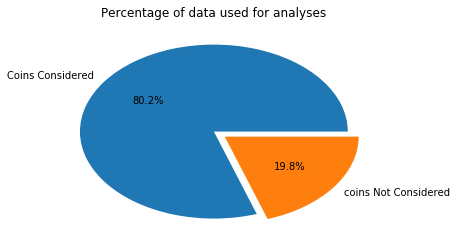

In [73]:
coinsConsidered = 1214
coinsNotConsidered = 300
plt.pie(x = [coinsConsidered,coinsNotConsidered], labels=['Coins Considered','coins Not Considered'], explode = (0.0, 0.1), 
        autopct='%1.1f%%')
plt.title('Percentage of data used for analyses')
plt.show()

In [4]:
def CurrenciesByAttributeGraph(data,title):
    plt.figure(figsize=(12,5))
    plt.title(title)
    plt.plot(data.index,data.values)
    plt.show()

In [126]:
# data = dataset_indexed.groupby(['name', 'year']).sum()['volume'].unstack(level=0).fillna(0)

In [127]:
# plt.figure(figsize=(12,5))
# plt.plot(data.index,data.values)
# plt.legend(data.columns)
# plt.show()

# data.index

In [128]:
# data = dataset_indexed.groupby(['name']).sum().sort_values('market', ascending=False)['market'].head(5)


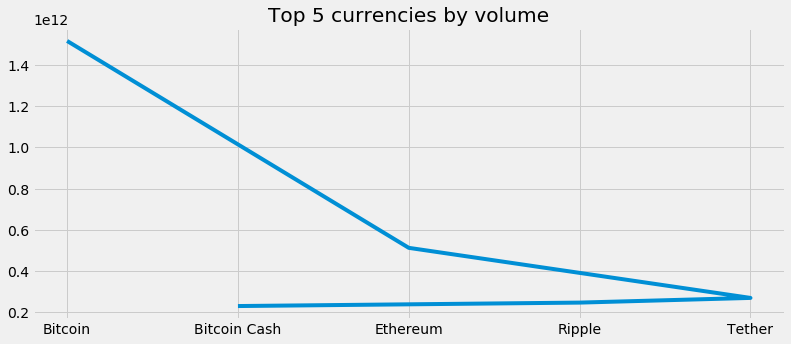

In [129]:
top5currenciesByVolume = topKCurrenciesByAttribute(5,'volume')
CurrenciesByAttributeGraph( top5currenciesByVolume, 'Top 5 currencies by volume')

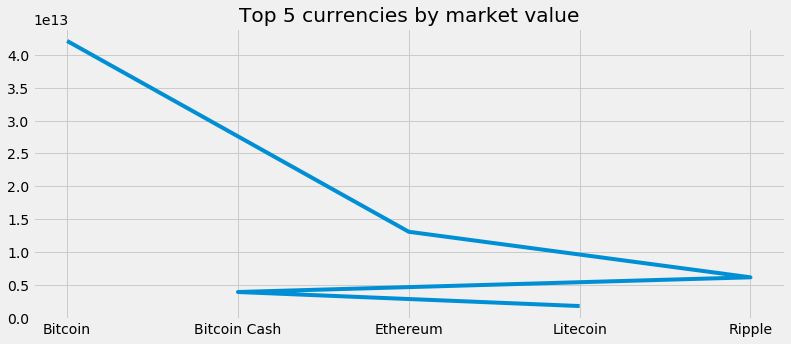

In [130]:
top5currenciesByMarket = topKCurrenciesByAttribute(5,'market')
CurrenciesByAttributeGraph(top5currenciesByMarket, 'Top 5 currencies by market value')

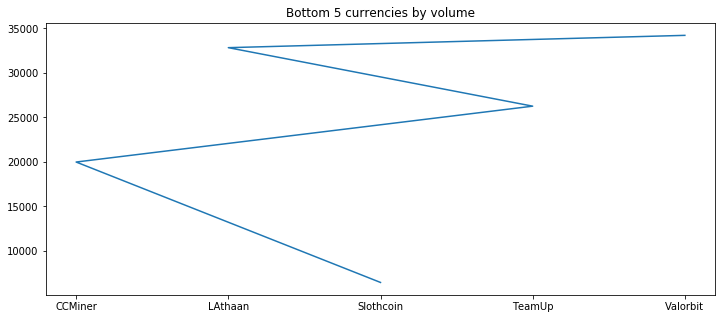

In [168]:
#  low volume means people dont prefer to use these currencies
bottom5currenciesByVolume = bottomKCurrenciesByAttribute(5,'volume')
CurrenciesByAttributeGraph( bottom5currenciesByVolume, 'Bottom 5 currencies by volume')

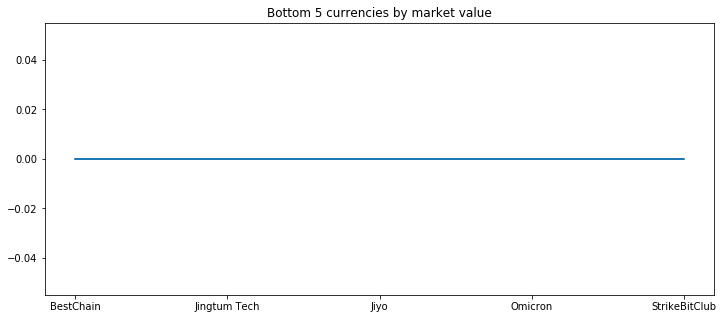

In [169]:
# low market value means low number of comapny shares or low
bottom5currenciesByMarket = bottomKCurrenciesByAttribute(5,'market')
CurrenciesByAttributeGraph(bottom5currenciesByMarket, 'Bottom 5 currencies by market value')

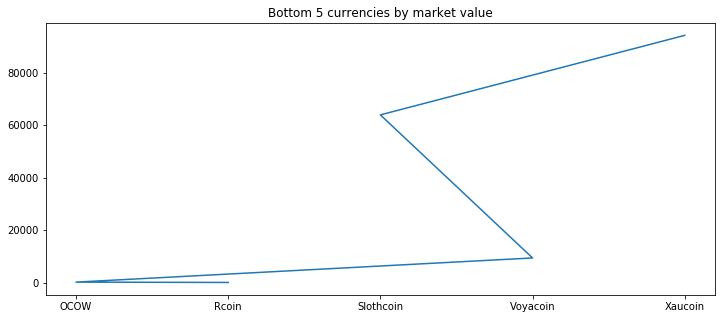

In [15]:
bottom5currenciesByMarket = bottomKCurrenciesByAttribute(5,'market')
# bottom5currenciesByMarket
CurrenciesByAttributeGraph(bottom5currenciesByMarket, 'Bottom 5 currencies by market value')

In [131]:
def yearwiseCurrenciesByAttribute(attribute):
    data = dataset_indexed.groupby(['year','name']).sum().sort_values(attribute, ascending=False)[attribute].unstack(level=1).fillna(0)
    return data

In [132]:
yearwiseDistributionByVolume = yearwiseCurrenciesByAttribute('volume')
yearwiseDistributionByMarket = yearwiseCurrenciesByAttribute('market')

In [133]:
def yearwiseCurrenciesByAttributeGraph(yearwiseDistributionByAttribute, top5currenciesByattribute, title):
    plt.figure(figsize=(12,5))
    plt.style.use('fivethirtyeight')
    plt.title(title)
    for currency in top5currenciesByattribute.index:
        data = yearwiseDistributionByAttribute[currency]
        plt.plot(data.index,data.values)
    plt.legend(top5currenciesByattribute.index)
    plt.show()

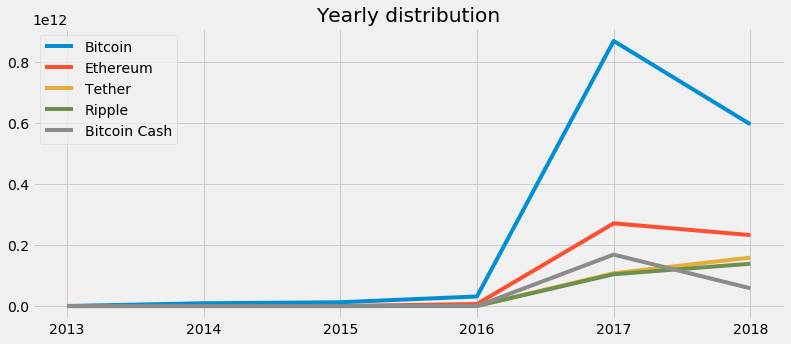

In [134]:
yearwiseCurrenciesByAttributeGraph(yearwiseDistributionByVolume, top5currenciesByVolume, 'Yearly distribution')

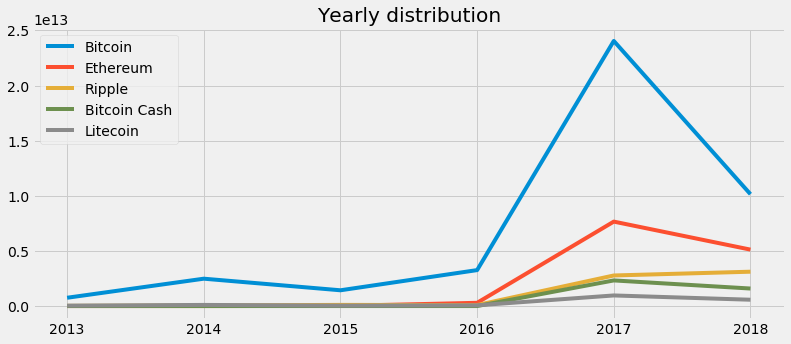

In [135]:
yearwiseCurrenciesByAttributeGraph(yearwiseDistributionByMarket, top5currenciesByMarket, 'Yearly distribution')

 # trying to find dead coins

In [17]:
dataset_name_indexed = dataset.set_index(['name']).sort_index()

In [22]:
dataset_name_indexed.index

Index(['0x', '0x', '0x', '0x', '0x', '0x', '0x', '0x', '0x', '0x',
       ...
       'vTorrent', 'vTorrent', 'vTorrent', 'vTorrent', 'vTorrent', 'vTorrent',
       'vTorrent', 'vTorrent', 'vTorrent', 'vTorrent'],
      dtype='object', name='name', length=702166)

In [45]:
dataset_name_indexed.loc['Litecoin Cash'].shape[0]
# Litecoin Cash

12

In [47]:
coin_name = []
coin_maxDate = []
coin_encountered = []
for coin in dataset_name_indexed.index:
    if coin not in coin_encountered:
        coin_encountered.append(coin)
        if dataset_name_indexed.loc[coin].shape[0] > 15:
            coin_name.append(coin)
            coin_maxDate.append(dataset_name_indexed.loc[coin]['date'].max())

In [71]:
coin_lastDateDf= pd.Series(data = coin_name, index = coin_maxDate)

In [69]:
# coin_lastDateDf.index.
# coin_lastDateDf = pd.to_datetime(coin_lastDateDf.index)

In [76]:
coin_lastDateDf.index[coin_lastDateDf.index < '2018-01-01']

Index([], dtype='object')

In [77]:
#  This mean we have data for all active coins

 # trying to find out that are not doing well

In [83]:
dataset = pd.read_csv('crypto-markets.csv')

In [87]:
dataset['date'] = pd.to_datetime(dataset['date'])
# dataset['date'] = pd.datetime.strptime(dataset['date'], '%Y-%m-%d')
dataset.dtypes

slug                   object
symbol                 object
name                   object
date           datetime64[ns]
ranknow                 int64
open                  float64
high                  float64
low                   float64
close                 float64
volume                  int64
market                  int64
close_ratio           float64
spread                float64
dtype: object

In [111]:
dataset_date_indexed = dataset.set_index(['date'])

In [134]:
dataset_date_indexed

,slug,symbol,name,ranknow,open,high,low,close,volume,market,close_ratio,spread
date,,,,,,,,,,,,
2013-04-28,bitcoin,BTC,Bitcoin,1,135.300000,135.980000,132.100000,134.210000,0,1500520000,0.5438,3.88
2013-04-29,bitcoin,BTC,Bitcoin,1,134.440000,147.490000,134.000000,144.540000,0,1491160000,0.7813,13.49
2013-04-30,bitcoin,BTC,Bitcoin,1,144.000000,146.930000,134.050000,139.000000,0,1597780000,0.3843,12.88
2013-05-01,bitcoin,BTC,Bitcoin,1,139.000000,139.890000,107.720000,116.990000,0,1542820000,0.2882,32.17
2013-05-02,bitcoin,BTC,Bitcoin,1,116.380000,125.600000,92.280000,105.210000,0,1292190000,0.3881,33.32
2013-05-03,bitcoin,BTC,Bitcoin,1,106.250000,108.130000,79.100000,97.750000,0,1180070000,0.6424,29.03
2013-05-04,bitcoin,BTC,Bitcoin,1,98.100000,115.000000,92.500000,112.500000,0,1089890000,0.8889,22.50
2013-05-05,bitcoin,BTC,Bitcoin,1,112.900000,118.800000,107.140000,115.910000,0,1254760000,0.7521,11.66
2013-05-06,bitcoin,BTC,Bitcoin,1,115.980000,124.660000,106.640000,112.300000,0,1289470000,0.3141,18.02


In [155]:
dataset_name_indexed = dataset.set_index(['name'])

In [158]:
dataset_name_indexed.loc['Bitcoin']

,slug,symbol,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
name,,,,,,,,,,,,
Bitcoin,bitcoin,BTC,2013-04-28,1,135.30,135.98,132.10,134.21,0,1500520000,0.5438,3.88
Bitcoin,bitcoin,BTC,2013-04-29,1,134.44,147.49,134.00,144.54,0,1491160000,0.7813,13.49
Bitcoin,bitcoin,BTC,2013-04-30,1,144.00,146.93,134.05,139.00,0,1597780000,0.3843,12.88
Bitcoin,bitcoin,BTC,2013-05-01,1,139.00,139.89,107.72,116.99,0,1542820000,0.2882,32.17
Bitcoin,bitcoin,BTC,2013-05-02,1,116.38,125.60,92.28,105.21,0,1292190000,0.3881,33.32
Bitcoin,bitcoin,BTC,2013-05-03,1,106.25,108.13,79.10,97.75,0,1180070000,0.6424,29.03
Bitcoin,bitcoin,BTC,2013-05-04,1,98.10,115.00,92.50,112.50,0,1089890000,0.8889,22.50
Bitcoin,bitcoin,BTC,2013-05-05,1,112.90,118.80,107.14,115.91,0,1254760000,0.7521,11.66
Bitcoin,bitcoin,BTC,2013-05-06,1,115.98,124.66,106.64,112.30,0,1289470000,0.3141,18.02


In [115]:
dataset_date_indexed.shape

(702166, 12)

0.0

In [124]:
dat.max()

1.0

In [125]:
MinMaxNormalizeData.min()

name     0x
open      0
high      0
low       0
close     0
dtype: object

In [126]:
MinMaxNormalizeData.max()

name     vTorrent
open            1
high            1
low             1
close           1
dtype: object

In [127]:
datesDF = pd.DataFrame(pd.to_datetime(dataset['date']),columns = ['date'])
MinMaxNormalizeData=pd.concat([ datesDF, MinMaxNormalizeData ], axis=1)

In [131]:
minMaxIndexedDataset = MinMaxNormalizeData.set_index(['date'])

In [132]:
minMaxIndexedDataset

,name,open,high,low,close
date,,,,,
2013-04-28,Bitcoin,5.886729e-05,4.647141e-05,6.505498e-05,5.833341e-05
2013-04-29,Bitcoin,5.849312e-05,5.040498e-05,6.599067e-05,6.282327e-05
2013-04-30,Bitcoin,6.265255e-05,5.021359e-05,6.601530e-05,6.041534e-05
2013-05-01,Bitcoin,6.047712e-05,4.780766e-05,5.304862e-05,5.084886e-05
2013-05-02,Bitcoin,5.063544e-05,4.292403e-05,4.544492e-05,4.572877e-05
2013-05-03,Bitcoin,4.622801e-05,3.695362e-05,3.895420e-05,4.248633e-05
2013-05-04,Bitcoin,4.268205e-05,3.930146e-05,4.555326e-05,4.889731e-05
2013-05-05,Bitcoin,4.912134e-05,4.060012e-05,5.276299e-05,5.037944e-05
2013-05-06,Bitcoin,5.046141e-05,4.260278e-05,5.251676e-05,4.881038e-05


In [120]:
# Top performers
# dataset = pd.read_csv('crypto-markets.csv')
# dataset['date'] = pd.to_datetime(dataset['date'])
MinMaxNormalizeData.dtypes

date      datetime64[ns]
name              object
open             float64
high             float64
low              float64
close            float64
market           float64
volume           float64
dtype: object

In [127]:
nameSorted = MinMaxNormalizeData.set_index(['name'])

In [128]:
marketData = nameSorted.groupby('name')['market'].sum()
marketDataDF = pd.DataFrame(marketData,columns = ['market'])
marketDataDF = marketDataDF[marketDataDF['market'] != 0]
worstCurrencyPerformers = marketDataDF.sort_values(by='market').head(5).index
topCurrencyPerformers = marketDataDF.sort_values(by='market', ascending = False).head(5).index

In [129]:
# marketDataDF.sort_values(by='market')

In [130]:
worstCurrencyPerformersData = MinMaxNormalizeData[MinMaxNormalizeData['name'].isin(worstCurrencyPerformers)]

In [131]:
topCurrencyPerformersData = MinMaxNormalizeData[MinMaxNormalizeData['name'].isin(topCurrencyPerformers)]

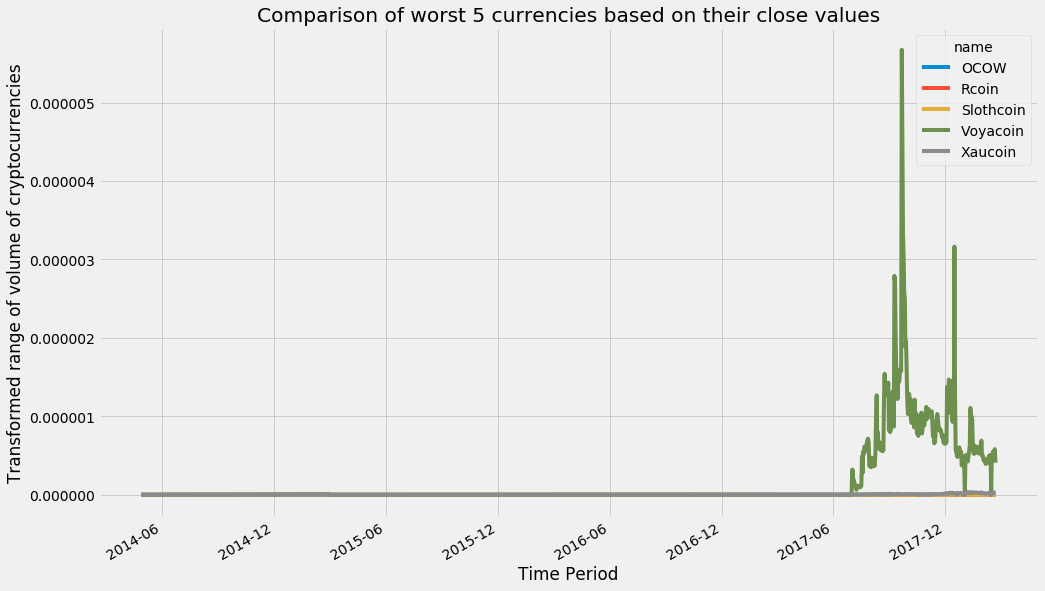

In [132]:
worst5CurrenciesPricePerUnit = worstCurrencyPerformersData.groupby(['date','name'])['close'].mean().unstack()
# worst5CurrenciesPricePerUnit
for coin in worstCurrencyPerformers:
    worst5CurrenciesPricePerUnit_fillNA[coin] = worst5CurrenciesPricePerUnit[coin].fillna(worst5CurrenciesPricePerUnit['OCOW'].mean())
worst5CurrenciesPricePerUnit_fillNA.plot(legend=True,figsize=(15, 10), title='Comparison of worst 5 currencies based on their close values')
plt.ylabel('Transformed range of volume of cryptocurrencies')
plt.xlabel('Time Period')
plt.show()

In [133]:
worst5CurrenciesPricePerUnit_fillNA

name,OCOW,Rcoin,Slothcoin,Voyacoin,Xaucoin
date,,,,,
2014-04-28,7.469492e-10,7.469492e-10,1.738571e-12,7.469492e-10,7.469492e-10
2015-02-28,7.469492e-10,7.469492e-10,7.469492e-10,7.857907e-09,7.469492e-10
2015-03-01,7.469492e-10,7.469492e-10,7.469492e-10,2.629154e-09,7.469492e-10
2015-03-02,7.469492e-10,7.469492e-10,7.469492e-10,1.865487e-09,7.469492e-10
2015-03-03,7.469492e-10,7.469492e-10,7.469492e-10,6.337092e-10,7.469492e-10
2015-03-04,7.469492e-10,7.469492e-10,7.469492e-10,1.369125e-09,7.469492e-10
2015-03-05,7.469492e-10,7.469492e-10,7.469492e-10,1.721185e-10,7.469492e-10
2015-03-06,7.469492e-10,7.469492e-10,7.469492e-10,2.620896e-10,7.469492e-10
2015-03-07,7.469492e-10,7.469492e-10,7.469492e-10,5.337413e-10,7.469492e-10


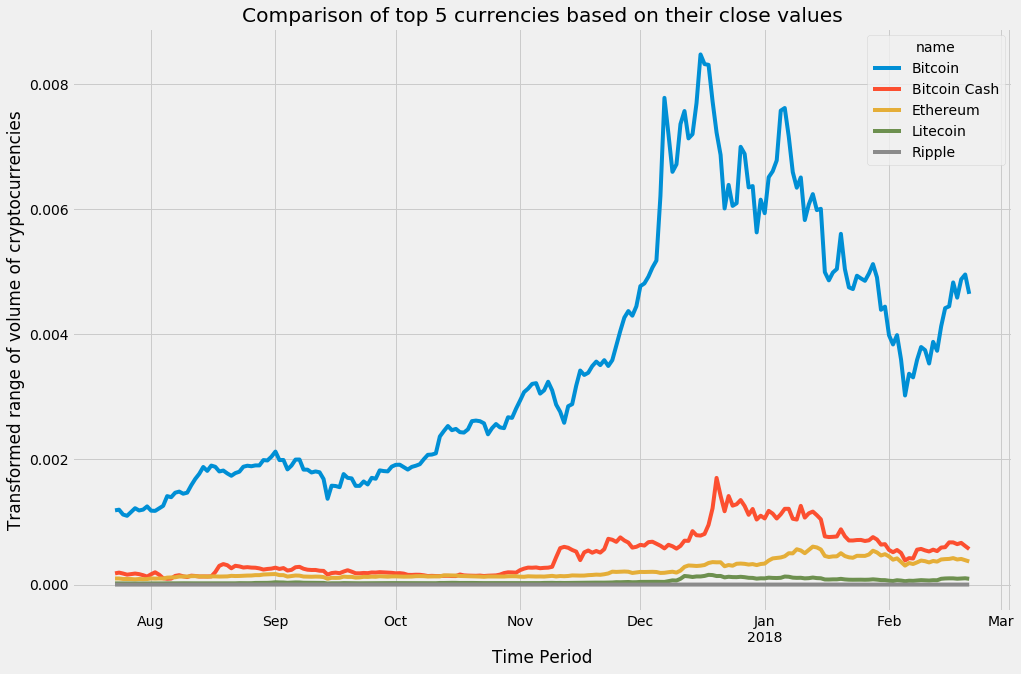

In [134]:
plt.style.use('fivethirtyeight')
top5CurrenciesPricePerUnit = topCurrencyPerformersData.groupby(['date','name'])['close'].mean().unstack()
top5CurrenciesPricePerUnit_dropNA = top5CurrenciesPricePerUnit.dropna(axis=0, how='any')
top5CurrenciesPricePerUnit_dropNA.plot(legend=True,figsize=(15, 10), 
                                        title='Comparison of top 5 currencies based on their close values')
plt.ylabel('Transformed range of volume of cryptocurrencies')
plt.xlabel('Time Period')
plt.show()

In [40]:
nameSorted.loc['Bitcoin']

,slug,symbol,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
name,,,,,,,,,,,,
Bitcoin,bitcoin,BTC,2013-04-28,1,135.30,135.98,132.10,134.21,0,1500520000,0.5438,3.88
Bitcoin,bitcoin,BTC,2013-04-29,1,134.44,147.49,134.00,144.54,0,1491160000,0.7813,13.49
Bitcoin,bitcoin,BTC,2013-04-30,1,144.00,146.93,134.05,139.00,0,1597780000,0.3843,12.88
Bitcoin,bitcoin,BTC,2013-05-01,1,139.00,139.89,107.72,116.99,0,1542820000,0.2882,32.17
Bitcoin,bitcoin,BTC,2013-05-02,1,116.38,125.60,92.28,105.21,0,1292190000,0.3881,33.32
Bitcoin,bitcoin,BTC,2013-05-03,1,106.25,108.13,79.10,97.75,0,1180070000,0.6424,29.03
Bitcoin,bitcoin,BTC,2013-05-04,1,98.10,115.00,92.50,112.50,0,1089890000,0.8889,22.50
Bitcoin,bitcoin,BTC,2013-05-05,1,112.90,118.80,107.14,115.91,0,1254760000,0.7521,11.66
Bitcoin,bitcoin,BTC,2013-05-06,1,115.98,124.66,106.64,112.30,0,1289470000,0.3141,18.02
